In [1]:
# Importing Necessary Libraries
import os
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
os.chdir("give the path here")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hr_data.csv to hr_data.csv


In [24]:
#Reading the dataset
#df=pd.read_csv("hr_data.csv")
df = pd.read_csv("/content/hr_data.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [25]:
#Checking the size of dataset
df.shape

(54808, 14)

In [26]:
# Dataset Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [27]:
#Checking for null Values
df.isnull().sum()/df.shape[0]

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [0]:
#Treating Null values

In [29]:
df.previous_year_rating.median()

3.0

In [30]:
df.education.mode()

0    Bachelor's
dtype: object

In [31]:
df.previous_year_rating=df.previous_year_rating.fillna(3)
df.education=df.education.fillna("Bachelor's")
df.head(15)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [32]:
#Evaluation Null fix
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [33]:
#Feature selction
df=df.drop(columns=['employee_id','region','recruitment_channel','department','gender','age'])
df.head()

,education,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Master's & above,1,5.0,8,1,0,49,0
1,Bachelor's,1,5.0,4,0,0,60,0
2,Bachelor's,1,3.0,7,0,0,50,0
3,Bachelor's,2,1.0,10,0,0,50,0
4,Bachelor's,1,3.0,2,0,0,73,0


In [0]:
#Plotting Correlation
corr=df.corr()

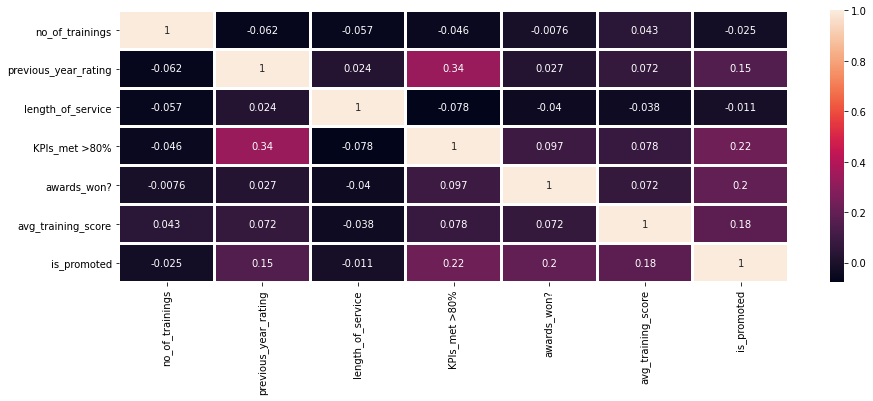

In [35]:
plt.figure(figsize = (15,5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, linewidths=2, annot=True)

In [0]:
#Checking Frequency Distribution

In [37]:
df.education.value_counts(normalize=True)

Bachelor's          0.712998
Master's & above    0.272314
Below Secondary     0.014688
Name: education, dtype: float64

In [38]:
df.is_promoted.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [40]:
#Converting catergorical varibale to numerical variables
df1=pd.get_dummies(df, columns=['education'], drop_first=True)
df1.head()

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Below Secondary,education_Master's & above
0,1,5.0,8,1,0,49,0,0,1
1,1,5.0,4,0,0,60,0,0,0
2,1,3.0,7,0,0,50,0,0,0
3,2,1.0,10,0,0,50,0,0,0
4,1,3.0,2,0,0,73,0,0,0


In [41]:
#Converting catergorical varibale to numerical variables
df=pd.get_dummies(df, columns=['education'])
df.head()

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above
0,1,5.0,8,1,0,49,0,0,0,1
1,1,5.0,4,0,0,60,0,1,0,0
2,1,3.0,7,0,0,50,0,1,0,0
3,2,1.0,10,0,0,50,0,1,0,0
4,1,3.0,2,0,0,73,0,1,0,0


In [42]:
#defining Independent & Dependent Variables
input_columns= [column for column in df.columns if column != 'is_promoted']
output_column= 'is_promoted'
print (input_columns)
print (output_column)

['no_of_trainings', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', "education_Bachelor's", 'education_Below Secondary', "education_Master's & above"]
is_promoted


In [43]:
#Assigning the variables to X & Y
x=df.loc[:,input_columns]
y=df.loc[:,output_column]
print(x.shape, y.shape)

(54808, 9) (54808,)


In [0]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=100, stratify=y )

In [45]:
print (x_train.shape)
print (x_train.shape)
print (y_train.shape)
print (y_train.shape)

(38365, 9)
(38365, 9)
(38365,)
(38365,)


In [0]:
#Biulding  Decision Tree
from sklearn.tree import DecisionTreeClassifier
Dtree=DecisionTreeClassifier(criterion='gini', max_depth=10,random_state=121).fit(x_train,y_train)

In [86]:
Dtree.score(x_train,y_train)

0.9287631956210087

In [87]:
Dtree.score(x_test,y_test)

0.9246487867177522

In [0]:
#Prediction
predictions=Dtree.predict(x_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
#Classification Report 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15043
           1       0.79      0.16      0.27      1400

    accuracy                           0.92     16443
   macro avg       0.86      0.58      0.61     16443
weighted avg       0.92      0.92      0.90     16443



In [0]:
#Classification Report 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     15043
           1       0.38      0.22      0.28      1400

    accuracy                           0.90     16443
   macro avg       0.65      0.59      0.61     16443
weighted avg       0.88      0.90      0.89     16443



In [88]:
#Confusion Matrix
Dtree_Conf_Mat=confusion_matrix(y_test,predictions)
print(Dtree_Conf_Mat)

[[14982    61]
 [ 1175   225]]


In [0]:
from sklearn.metrics import accuracy_score

In [90]:
#Accuracy Score
Accuracy_Dtree=accuracy_score(y_test,predictions)
Accuracy_Dtree

0.9248312351760628

[Text(248.72747426470588, 207.55636363636364, 'X[5] <= 90.5\ngini = 0.156\nsamples = 38365\nvalue = [35097, 3268]'),
 Text(177.52400735294117, 187.7890909090909, 'X[3] <= 0.5\ngini = 0.142\nsamples = 37964\nvalue = [35048, 2916]'),
 Text(99.38144117647059, 168.0218181818182, 'X[4] <= 0.5\ngini = 0.067\nsamples = 24784\nvalue = [23921, 863]'),
 Text(62.57805882352941, 148.25454545454545, 'X[1] <= 4.5\ngini = 0.058\nsamples = 24518\nvalue = [23782, 736]'),
 Text(29.491941176470586, 128.48727272727274, 'X[5] <= 59.5\ngini = 0.038\nsamples = 21681\nvalue = [21258, 423]'),
 Text(12.21035294117647, 108.72, 'X[5] <= 57.5\ngini = 0.004\nsamples = 10727\nvalue = [10703, 24]'),
 Text(5.514352941176471, 88.95272727272729, 'X[5] <= 54.5\ngini = 0.001\nsamples = 9372\nvalue = [9366, 6]'),
 Text(4.726588235294118, 69.18545454545455, 'gini = 0.0\nsamples = 8122\nvalue = [8122, 0]'),
 Text(6.302117647058823, 69.18545454545455, 'X[2] <= 2.5\ngini = 0.01\nsamples = 1250\nvalue = [1244, 6]'),
 Text(3.151

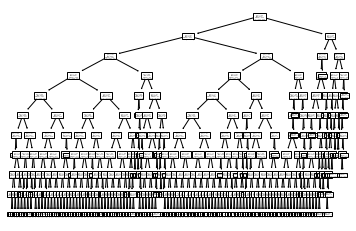

In [92]:

from sklearn import tree
tree.plot_tree(Dtree.fit(x_train,y_train)) 

In [0]:
#Biulding  Random Forest
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=500).fit(x_train,y_train)

In [0]:
Rf.score(x_train,y_train)

0.9514140492636518

In [0]:
#Predictions
Rf_predictions= Rf.predict(x_test)

In [0]:
#Classification report
print(classification_report(y_test,Rf_predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     15043
           1       0.45      0.22      0.29      1400

    accuracy                           0.91     16443
   macro avg       0.69      0.60      0.62     16443
weighted avg       0.89      0.91      0.90     16443



In [0]:
#Confusion matrix
Rf_Conf_Mat=confusion_matrix(y_test,Rf_predictions)
print(Rf_Conf_Mat)

[[14669   374]
 [ 1094   306]]


In [0]:
#Accuracy Score
Accuracy_Rf=accuracy_score(y_test,Rf_predictions)
Accuracy_Rf

0.910721887733382